In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import spotify
import utils

sp = spotify.login(scope='playlist-modify-private')
user = sp.current_user()
username = user['id']
displayName = user['display_name']
displayName

'Mehmet Birgi'

In [2]:
# get all my playlists 
response = sp.current_user_playlists()
all_playlists = response['items']
while response['next']:
    response = sp.next(response)
    all_playlists.extend(response['items'])
len(all_playlists)

90

In [3]:
# save the playlists as a list of dictionaries
import json
import os
folder = 'data'
filename = 'all_my_playlists.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(all_playlists, f, ensure_ascii=False, indent=4)

In [4]:
# extract all tracks from playlists
playlist_ids = [playlist['id'] for playlist in all_playlists]
all_playlist_tracks = [item['track'] for item in spotify.get_tracks_in_playlists(sp, playlist_ids)]
len(all_playlist_tracks)

14990

In [5]:
# extract the pertinent information
all_tracks = []
for track in all_playlist_tracks:
    name = track['name']
    artists = [{'name': artist['name'], 'id': artist['id']} for artist in track['artists']]
    track_id = track['id']
    duration_ms = track['duration_ms']
    all_tracks.append({
        'name': name,
        'artists': artists,
        'id': track_id,
        'duration_ms': duration_ms
    })
len(all_tracks)

14990

In [6]:
# save the tracks
import json
import os
folder = 'data'
filename = 'all_my_playlist_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(all_tracks, f, ensure_ascii=False, indent=4)

In [7]:
# get all 'liked' tracks and add them to the tally
results = sp.current_user_saved_tracks(limit=50)
saved_tracks = results['items']
while results['next']:
    results = sp.next(results)
    saved_tracks.extend(results['items'])
for item in saved_tracks:
    name = item['track']['name']
    artists = [{'name': artist['name'], 'id': artist['id']} for artist in item['track']['artists']]
    track_id = item['track']['id']
    duration_ms = item['track']['duration_ms']
    all_tracks.append({
        'name': name,
        'artists': artists,
        'id': track_id,
        'duration_ms': duration_ms
    })
len(all_tracks)

15151

In [36]:
all_tracks[14458]

{'name': '(Man Oh Man) I Want To Go Back',
 'artists': [{'name': 'The Impressions', 'id': '1b1N51wmSK0ckxFAMPSSHO'}],
 'id': '2AZgCOwFyIk6d7JH591VoR',
 'duration_ms': 185866}

In [46]:
# get saved album tracks and add them to the tally
results = sp.current_user_saved_albums(limit=50)
saved_albums = results['items']
while results['next']:
    results = sp.next(results)
    saved_albums.extend(results['items'])
len(saved_albums)
saved_album_tracks = []
for album in saved_albums:
    results = sp.album_tracks(album['album']['id'])
    album_tracks = results['items']
    while results['next']:
        results = sp.next(results)
        album_tracks.extend(results['items'])
    saved_album_tracks.extend(album_tracks)
album_tracks = []
for track in saved_album_tracks:
    name = track['name']
    artists = [{'name': artist['name'], 'id': artist['id']} for artist in track['artists']]
    track_id = track['id']
    duration_ms = track['duration_ms']
    album_tracks.append({
        'name': name,
        'artists': artists,
        'id': track_id,
        'duration_ms': duration_ms
    })
all_tracks.extend(album_tracks)

...
...
...
...
...
...
...
...
...
...
...
...
...
...


743

In [59]:
len(all_tracks)

24228

In [60]:
# save tracks for later
import json
import os
folder = 'data'
filename = 'all_my_tracks.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(all_tracks, f, ensure_ascii=False, indent=4)

In [2]:
# read the tracks
import json
import os
folder = 'data'
filename = 'all_my_tracks.json'
with open(os.path.join(folder, filename), 'r', encoding='utf-8') as f:
    all_tracks = json.load(f)

In [3]:
len(all_tracks)

24228

In [7]:
# get audio features
all_track_ids = [track['id'] for track in all_tracks]
audio_features = spotify.get_audio_features_for_tracks(sp, all_track_ids)

retrying ...3secs
retrying ...3secs
retrying ...3secs


In [8]:
audio_features

[{'danceability': 0.805,
  'energy': 0.596,
  'key': 2,
  'loudness': -8.204,
  'mode': 1,
  'speechiness': 0.211,
  'acousticness': 0.28,
  'instrumentalness': 0.00016,
  'liveness': 0.146,
  'valence': 0.663,
  'tempo': 97.053,
  'type': 'audio_features',
  'id': '7DT6KqAWW8fHJfWuHddxPt',
  'uri': 'spotify:track:7DT6KqAWW8fHJfWuHddxPt',
  'track_href': 'https://api.spotify.com/v1/tracks/7DT6KqAWW8fHJfWuHddxPt',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DT6KqAWW8fHJfWuHddxPt',
  'duration_ms': 182773,
  'time_signature': 4},
 {'danceability': 0.724,
  'energy': 0.902,
  'key': 9,
  'loudness': -5.62,
  'mode': 0,
  'speechiness': 0.153,
  'acousticness': 0.176,
  'instrumentalness': 0.000208,
  'liveness': 0.104,
  'valence': 0.735,
  'tempo': 122.435,
  'type': 'audio_features',
  'id': '6izZJJsAFod5XAivYYtf9r',
  'uri': 'spotify:track:6izZJJsAFod5XAivYYtf9r',
  'track_href': 'https://api.spotify.com/v1/tracks/6izZJJsAFod5XAivYYtf9r',
  'analysis_url': 'https://ap

In [9]:
len(audio_features)

24228

In [10]:
audio_features[0]

{'danceability': 0.805,
 'energy': 0.596,
 'key': 2,
 'loudness': -8.204,
 'mode': 1,
 'speechiness': 0.211,
 'acousticness': 0.28,
 'instrumentalness': 0.00016,
 'liveness': 0.146,
 'valence': 0.663,
 'tempo': 97.053,
 'type': 'audio_features',
 'id': '7DT6KqAWW8fHJfWuHddxPt',
 'uri': 'spotify:track:7DT6KqAWW8fHJfWuHddxPt',
 'track_href': 'https://api.spotify.com/v1/tracks/7DT6KqAWW8fHJfWuHddxPt',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7DT6KqAWW8fHJfWuHddxPt',
 'duration_ms': 182773,
 'time_signature': 4}

In [11]:
# save tracks for later
import json
import os
folder = 'data'
filename = 'all_my_tracks_audio_features.json'
if not os.path.exists(folder):
    os.mkdir(folder)
with open(os.path.join(folder, filename), 'w', encoding='utf-8') as f:
    json.dump(audio_features, f, ensure_ascii=False, indent=4)

In [13]:
len(audio_features)

24228

In [27]:
list(audio_features[0].keys())

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature']

In [39]:
for index, track in enumerate(audio_features):
    print(f"testing {index}")
    assert(list(track.keys()).sort() == ['danceability',
     'energy',
     'key',
     'loudness',
     'mode',
     'speechiness',
     'acousticness',
     'instrumentalness',
     'liveness',
     'valence',
     'tempo',
     'type',
     'id',
     'uri',
     'track_href',
     'analysis_url',
     'duration_ms',
     'time_signature'].sort())

testing 0
testing 1
testing 2
testing 3
testing 4
testing 5
testing 6
testing 7
testing 8
testing 9
testing 10
testing 11
testing 12
testing 13
testing 14
testing 15
testing 16
testing 17
testing 18
testing 19
testing 20
testing 21
testing 22
testing 23
testing 24
testing 25
testing 26
testing 27
testing 28
testing 29
testing 30
testing 31
testing 32
testing 33
testing 34
testing 35
testing 36
testing 37
testing 38
testing 39
testing 40
testing 41
testing 42
testing 43
testing 44
testing 45
testing 46
testing 47
testing 48
testing 49
testing 50
testing 51
testing 52
testing 53
testing 54
testing 55
testing 56
testing 57
testing 58
testing 59
testing 60
testing 61
testing 62
testing 63
testing 64
testing 65
testing 66
testing 67
testing 68
testing 69
testing 70
testing 71
testing 72
testing 73
testing 74
testing 75
testing 76
testing 77
testing 78
testing 79
testing 80
testing 81
testing 82
testing 83
testing 84
testing 85
testing 86
testing 87
testing 88
testing 89
testing 90
testing 9

In [38]:
audio_features.pop(2355)  # for some reason, this element is invalid

In [42]:
df_audio_features = pd.DataFrame(audio_features).drop(columns=['type', 'uri', 'track_href', 'analysis_url'])

In [43]:
df_audio_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.805,0.596,2,-8.204,1,0.2110,0.2800,0.000160,0.146,0.663,97.053,7DT6KqAWW8fHJfWuHddxPt,182773,4
1,0.724,0.902,9,-5.620,0,0.1530,0.1760,0.000208,0.104,0.735,122.435,6izZJJsAFod5XAivYYtf9r,186800,4
2,0.604,0.716,6,-6.772,0,0.1310,0.3310,0.000169,0.295,0.655,134.169,5rMw53xSX8BvYiZPRVQ8he,359093,4
3,0.372,0.892,5,-9.444,1,0.1170,0.0943,0.000107,0.358,0.573,165.185,5AU95bRMkW5QKaBSEUjnJo,207160,4
4,0.815,0.468,7,-10.458,1,0.2420,0.1260,0.502000,0.266,0.803,138.375,5LwcW7X6wZAHMnMuztJWem,186333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24222,0.553,0.713,5,-7.439,0,0.0547,0.7180,0.048100,0.298,0.919,122.472,2luQt6tGMTuN2gtDkLW5d9,154133,4
24223,0.401,0.534,7,-6.718,0,0.0575,0.8580,0.006420,0.514,0.644,176.344,72olRIwfBeJnXnDaaHLfDd,183773,4
24224,0.686,0.645,7,-7.316,0,0.1380,0.8490,0.050000,0.109,0.783,109.492,4kYyPN0Wdtn0UYfwtAQpjs,188427,4
24225,0.361,0.523,5,-7.349,1,0.0505,0.8930,0.057900,0.422,0.823,185.980,6dGgfasP5f2MHsuL64CZxC,198893,4


##### select the suitable tracks:

In [57]:
tempo_min, tempo_max = 135, 140
track_ids = set(df_audio_features[
    (df_audio_features['tempo'] >= tempo_min) & 
    (df_audio_features['tempo'] <= tempo_max) & 
    (df_audio_features['danceability'] >= 0.8) &
    (df_audio_features['liveness'] <= 0.4) &
    (df_audio_features['speechiness'] <= 0.33)
]['id'])
len(track_ids)

60

In [58]:
playlist_id, is_new = spotify.get_playlist_by_name(sp, 
        f"Run Test BPM {tempo_min} - {tempo_max} All Tracks", 
        create_if_none=True)
if playlist_id and is_new:
    print(f"Created new playlist with ID {playlist_id}")
elif playlist_id:
    print(f"Found existing playlist with ID {playlist_id}")
else:
    print("Something went wrong :-(")

Created new playlist with ID 25Xc4YfQeDlJ7yV31ZG7DL


In [59]:
spotify.add_tracks(sp, playlist_id, track_ids)

Playlist has 0 existing tracks
Skipping duplicates: True
60 tracks to be added
60 tracks added
OK


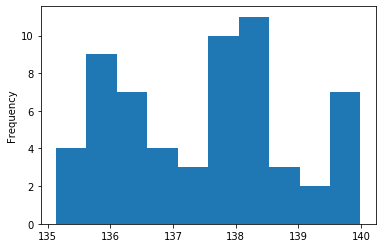

In [63]:
max_ids = 50
tracks_audio_features = []
track_ids = list(track_ids)
for i in range(0, len(track_ids), max_ids):
    results = sp.audio_features(track_ids[i:i+max_ids])
    tracks_audio_features.extend(results)
len(tracks_audio_features)
df_audio_features = pd.DataFrame(tracks_audio_features)
df_audio_features['tempo'].plot.hist()